Curse of dimensionality in hyperbolic spaces

In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from topocurse.sampling import random_points_hyperbolic
from topocurse.metrics import hyperbolic_distance
from topocurse.figures import contrast_plot

np.random.seed(0)

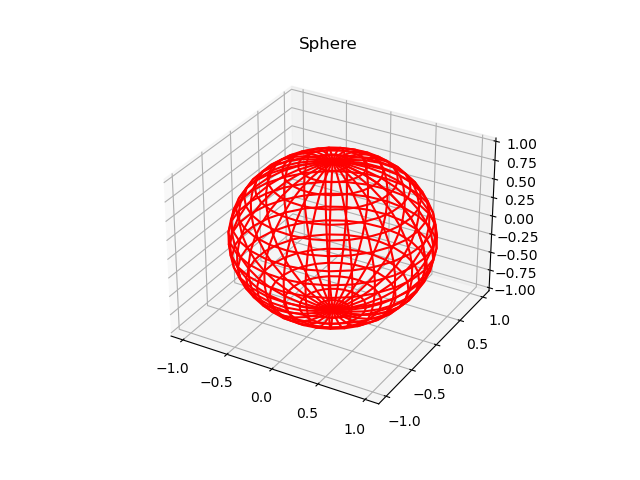

In [2]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="red")
ax.set_title("Sphere")
plt.show()

# Notebook config cells

In [3]:
# directories
user = "/home/edgar/"
work_directory = f"{user}/topological-curse-of-dimensionality"
save_plots_to = f"{work_directory}/images"

if os.path.exists(save_plots_to) is False:
    os.makedirs(save_plots_to)

In [4]:
# parameters

# scale of the hyperbolic space
H_scale = 1
# number of points to generate in H^n
N = 1_000
# number of dimensions
n_dimensions = 100  
nn = np.arange(1, n_dimensions + 1)
# contrast array
D_mm = np.empty(nn.size)

### H $^1$

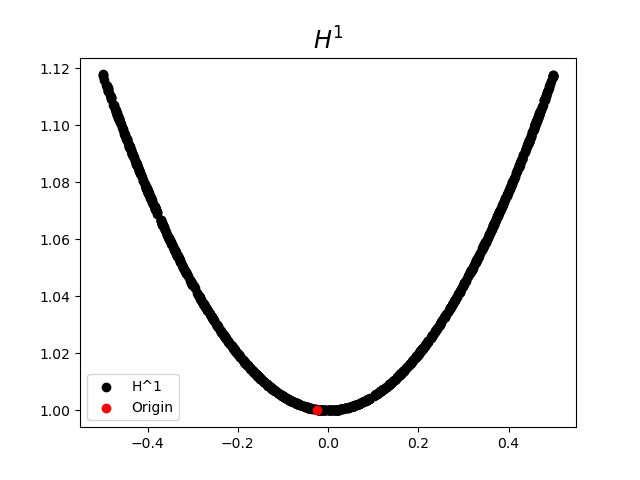

In [5]:
n = 1
n_1_hyper = None  # data for 2D and 3D plot

H_1 = random_points_hyperbolic(n=n, N=N, H_scale=H_scale)

# Query point
origin_at_minima = False

if origin_at_minima is False:

    Y = random_points_hyperbolic(n=n, N=1, H_scale=H_scale)

else:

    Y = None

# plot 1-hyperbolic space
fig, ax = plt.subplots(figsize=None)

ax.set_title("$H^1$", fontsize="xx-large")
ax.scatter(H_1[:, 1], H_1[:, 0], color="black", label="H^1")
ax.scatter(Y[:, 1], Y[:, 0], color="red", label="Origin")
ax.legend()
# fig.savefig(f"{save_plots_to}/n_2_hyperbolic_space.png")
# fig.savefig(f"{save_plots_to}/n_2_hyperbolic_space.pdf")

### H $^2$

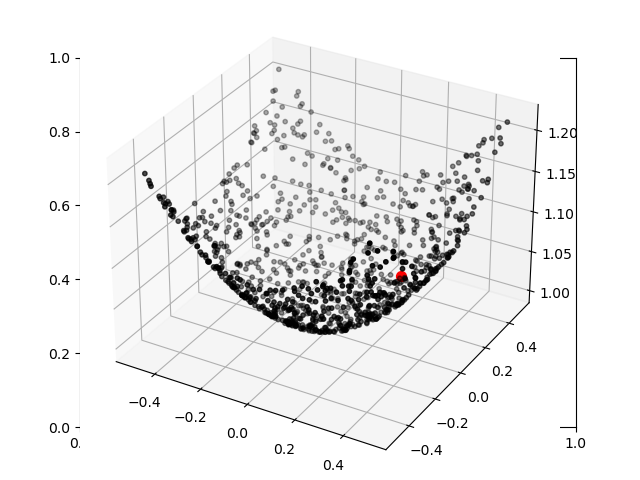

In [21]:
# 2-hyperbola
n = 2

H_2 = random_points_hyperbolic(n=n, N=N, H_scale=H_scale)

# Query point
origin_at_minima = False

if origin_at_minima is False:

    Y = random_points_hyperbolic(n=n, N=1, H_scale=H_scale)

else:

    # Set the origin at the minimum of the hyperbola
    Y = np.zeros(H_2.shape[1])*H_scale


fig, tmp = plt.subplots(
    figsize=None,
)
ax = Axes3D(fig=fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.set_title("$H^2$", fontsize="xx-large")
ax.scatter(
    H_2[:, 2], H_2[:, 1], H_2[:, 0],
    color="black", label="H^2", s=10
)
ax.scatter(
    Y[:, 2], Y[:, 1], Y[:, 0],
    color="red", label="Origin",
    s=50
)
# ax.mouse_init()
# plt.show()

In [ ]:
# for n in nn:

#     Hn = random_points_hyperbolic(n=n, N=N, H_scale=H_scale)

#     # data for 2D and 3D plot
#     if n == 1:
#         n_1_hyper = Hn.copy()

#     if n == 2:
#         n_2_hyper = Hn.copy()

#     # Query point
#     if origin_at_minima is False:

#         Y = random_points_hyperbolic(n=n, N=1, H_scale=H_scale)

#     else:

#         Y = None

#     d = hyperbolic_distance(
#         X=Hn,
#         Y=Y,
#         origin_at_minima=origin_at_minima,
#     )

#     D_mm[n - 1] = np.max(d) - np.min(d)


# # plot distance behavior in hyperbolic spaces
# fig, ax = contrast_plot(
#     metric="d(x,y)=arccosh($(Q(x+y)-2)/2 \\to Q(x) = x_0^2 - \cdots -x_n^2$",
#     title="Distance behavior in hyperbolic spaces",
# )

# ax.scatter(nn, D_mm)
# fig.savefig(f"{path_plot}/contrast_hyperbolic_space.png")
# fig.savefig(f"{path_plot}/contrast_hyperbolic_space.pdf")
# plt.close()